In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from cliffs_delta import cliffs_delta
from scipy import stats
from sklearn.datasets import make_regression
from sklearn.ensemble import RandomForestClassifier

In [2]:
# Read the data files
mir_df = pd.DataFrame(pd.read_csv('IST_MIR.csv'))
moz_df = pd.DataFrame(pd.read_csv('IST_MOZ.csv'))
ost_df = pd.DataFrame(pd.read_csv('IST_OST.csv'))
wik_df = pd.DataFrame(pd.read_csv('IST_WIK.csv'))

# Split the nondef and def datasets
mir_def = mir_df.loc[mir_df['defect_status'] == 1]
moz_def = moz_df.loc[moz_df['defect_status'] == 1]
ost_def = ost_df.loc[ost_df['defect_status'] == 1]
wik_def = wik_df.loc[wik_df['defect_status'] == 1]

mir_ndef = mir_df.loc[mir_df['defect_status'] == 0]
moz_ndef = moz_df.loc[moz_df['defect_status'] == 0]
ost_ndef = ost_df.loc[ost_df['defect_status'] == 0]
wik_ndef = wik_df.loc[wik_df['defect_status'] == 0]

# Merge the data
concatenated = pd.concat([mir_df, moz_df, ost_df, wik_df])

# Get thee headings
title = sorted(list(wik_df.columns)[-13:-1])
mir_ndef

,org,file_,URL,File,Lines_of_code,Require,Ensure,Include,Attribute,Hard_coded_string,Comment,Command,File_mode,SSH_KEY,defect_status
0,MIRANTIS,/Users/akond/PUPP_REPOS/mirantis-downloads/pup...,0,0,125,0,0,0,27,16,32,0,0,0,0
4,MIRANTIS,/Users/akond/PUPP_REPOS/mirantis-downloads/pup...,0,2,278,6,4,11,54,30,96,4,1,1,0
5,MIRANTIS,/Users/akond/PUPP_REPOS/mirantis-downloads/fue...,0,0,1,0,0,1,0,0,0,0,0,0,0
10,MIRANTIS,/Users/akond/PUPP_REPOS/mirantis-downloads/pup...,0,6,81,6,7,13,39,30,9,0,6,6,0
11,MIRANTIS,/Users/akond/PUPP_REPOS/mirantis-downloads/fue...,0,0,1,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174,MIRANTIS,/Users/akond/PUPP_REPOS/mirantis-downloads/pup...,0,0,9,0,0,3,0,0,4,0,0,0,0
175,MIRANTIS,/Users/akond/PUPP_REPOS/mirantis-downloads/pup...,0,0,37,0,1,1,16,13,4,0,0,0,0
176,MIRANTIS,/Users/akond/PUPP_REPOS/mirantis-downloads/pup...,0,0,11,0,0,0,0,0,4,0,0,0,0
177,MIRANTIS,/Users/akond/PUPP_REPOS/mirantis-downloads/pup...,0,1,33,1,0,1,6,4,9,0,1,1,0


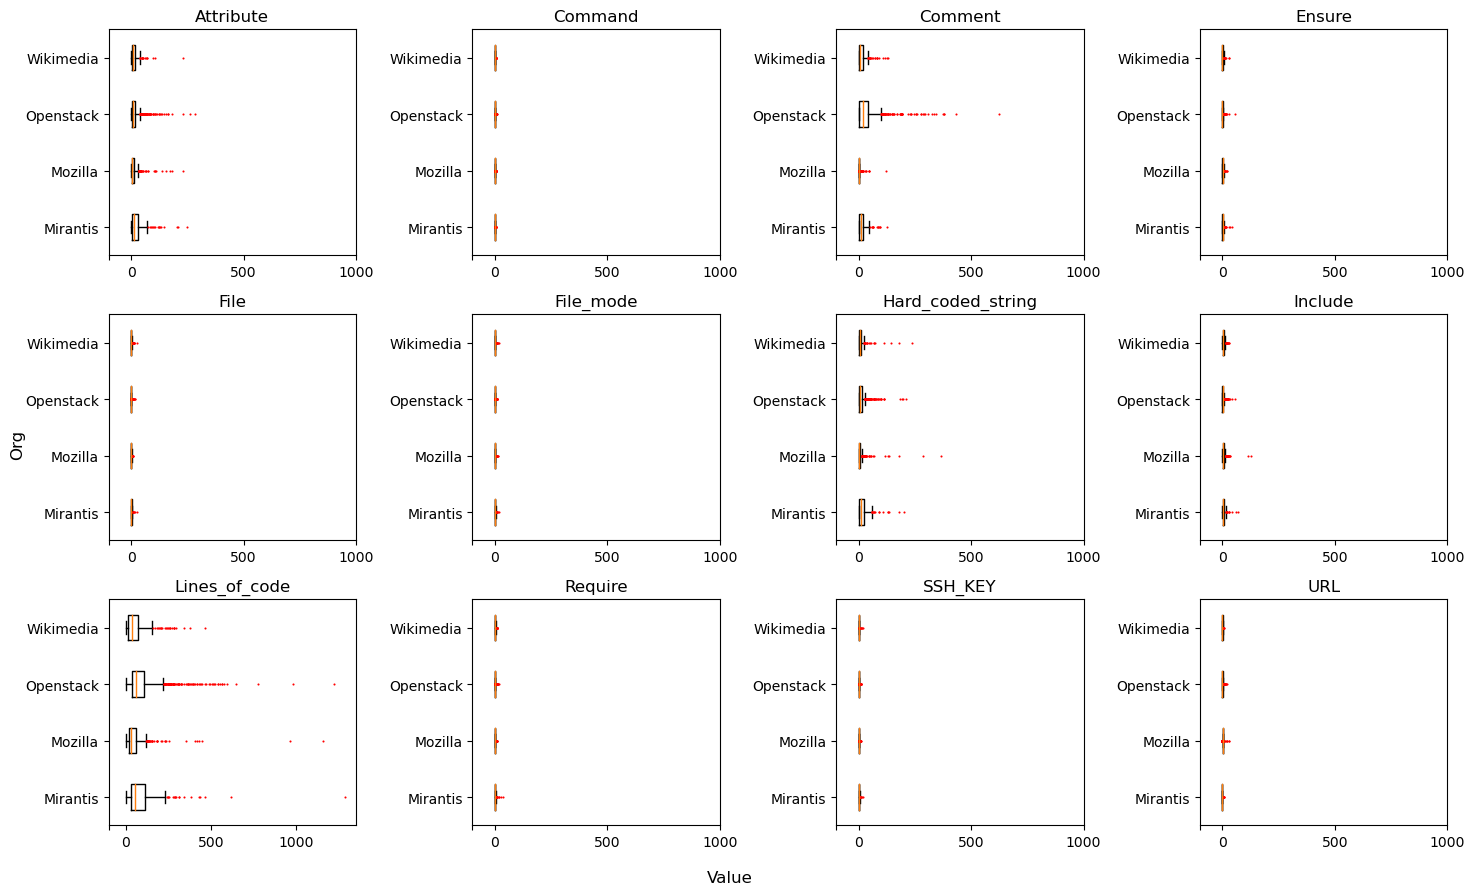

In [27]:
# Overall distributions
flierprops = dict(marker='.', markersize=3, markerfacecolor='red', markeredgecolor='none')
fig, axs = plt.subplots(3, 4, figsize=(15, 9))
for i in range(3):
    for j in range(4):
        ind = i*4+j
        axs[i][j].boxplot([mir_df[title[ind]], moz_df[title[ind]], ost_df[title[ind]], wik_df[title[ind]]], flierprops=flierprops, vert=False)
        axs[i][j].set_yticks(range(1, 5), ['Mirantis', 'Mozilla', 'Openstack', 'Wikimedia'])
        axs[i][j].set_xticks([-100, 0, 500, 1000], ['', '0', '500', '1000'])
        axs[i][j].set_title(title[ind])
fig.supxlabel('Value')
fig.supylabel('Org')
fig.tight_layout()
plt.show()

# Have a general understanding on every factor

In [175]:
# Construct another dataframe
mir_dis = ['(%.2f, %.2f)'%(mean, maximum) for mean, maximum in zip(mir_df[title].mean().round(2), mir_df[title].max().round(2))]
moz_dis = ['(%.2f, %.2f)'%(mean, maximum) for mean, maximum in zip(moz_df[title].mean().round(2), moz_df[title].max().round(2))]
ost_dis = ['(%.2f, %.2f)'%(mean, maximum) for mean, maximum in zip(ost_df[title].mean().round(2), ost_df[title].max().round(2))]
wik_dis = ['(%.2f, %.2f)'%(mean, maximum) for mean, maximum in zip(wik_df[title].mean().round(2), wik_df[title].max().round(2))]

data_list = np.array([mir_dis, moz_dis, ost_dis, wik_dis]).T
header = pd.Index(['Mirantis', 'Mozilla', 'Openstack', 'Wikimedia'], name='Properity')

dist_df = pd.DataFrame(data_list, 
                  index=title, 
                  columns=header)

dist_df

Properity,Mirantis,Mozilla,Openstack,Wikimedia
Attribute,"(26.21, 249.00)","(11.67, 229.00)","(15.19, 283.00)","(12.60, 232.00)"
Command,"(0.36, 6.00)","(0.35, 6.00)","(0.27, 8.00)","(0.42, 4.00)"
Comment,"(16.23, 128.00)","(4.11, 121.00)","(33.58, 623.00)","(13.88, 130.00)"
Ensure,"(2.96, 42.00)","(1.27, 22.00)","(1.14, 55.00)","(1.53, 28.00)"
File,"(1.53, 25.00)","(0.76, 10.00)","(0.40, 15.00)","(1.38, 27.00)"
File_mode,"(1.21, 17.00)","(0.65, 12.00)","(0.25, 11.00)","(0.70, 18.00)"
Hard_coded_string,"(19.84, 203.00)","(7.19, 364.00)","(10.77, 212.00)","(9.84, 235.00)"
Include,"(5.74, 70.00)","(4.93, 129.00)","(2.66, 57.00)","(4.14, 29.00)"
Lines_of_code,"(97.58, 1287.00)","(52.19, 1157.00)","(88.27, 1222.00)","(58.92, 464.00)"
Require,"(2.01, 35.00)","(0.71, 9.00)","(0.49, 20.00)","(1.23, 11.00)"


In [28]:
# Construct the Median dataframe
mir_med_def = [median for median in mir_def[title].median().round(1)]
moz_med_def = [median for median in moz_def[title].median().round(1)]
ost_med_def = [median for median in ost_def[title].median().round(1)]
wik_med_def = [median for median in wik_def[title].median().round(1)]

mir_med_ndef = [median for median in mir_ndef[title].median().round(1)]
moz_med_ndef = [median for median in moz_ndef[title].median().round(1)]
ost_med_ndef = [median for median in ost_ndef[title].median().round(1)]
wik_med_ndef = [median for median in wik_ndef[title].median().round(1)]

d_nd_arr = np.array([mir_med_def, mir_med_ndef,
           moz_med_def, moz_med_ndef,
           ost_med_def, ost_med_ndef,
           wik_med_def, wik_med_ndef]).T

header = pd.MultiIndex.from_product([['Mirantis', 'Mozilla', 'Openstack', 'Wikimedia'], 
                                      ['D', 'ND']], 
                                     names=['Properity',''])
d_nd_med_df = pd.DataFrame(d_nd_arr, 
                  index=title, 
                  columns=header)

d_nd_med_df

Properity         Mirantis       Mozilla       Openstack       Wikimedia      
                         D    ND       D    ND         D    ND         D    ND
Attribute             23.0   6.5    10.0   3.0      13.0   5.0      12.0   3.0
Command                0.0   0.0     0.0   0.0       0.0   0.0       0.0   0.0
Comment               14.0   4.5     3.0   3.0      17.0  21.0       8.0   4.0
Ensure                 2.0   0.0     1.0   1.0       0.0   0.0       1.0   0.0
File                   1.0   0.0     1.0   0.0       0.0   0.0       1.0   0.0
File_mode              1.0   0.0     0.0   0.0       0.0   0.0       0.0   0.0
Hard_coded_string     19.5   4.0     4.0   2.0       8.0   4.0       8.0   2.0
Include                5.0   1.0     4.0   2.0       2.0   1.0       4.0   1.0
Lines_of_code         90.0  38.0    53.0  25.0      77.0  46.0      57.0  20.0
Require                1.0   0.0     0.0   0.0       0.0   0.0       1.0   0.0
SSH_KEY                1.0   0.0     0.0   0.0       0.0   0.0       0.0   0.0
URL                    0.0   0.0     1.0   1.0       0.0   0.0       0.0   0.0

# Implement MWU test and Cliff's delta

In [36]:
# Compute cliff's delta and p-value
data_list = []
for t in title:
    temp = []
    if stats.mannwhitneyu(mir_def[t], mir_ndef[t], alternative='greater', method="asymptotic")[1] < 0.001:
        temp.append('<0.001')
    else:
        temp.append(stats.mannwhitneyu(mir_def[t], mir_ndef[t], alternative='greater', method="asymptotic")[1].round(3))
    temp.append(round(cliffs_delta(mir_def[t], mir_ndef[t])[0], 2))
    
    if stats.mannwhitneyu(moz_def[t], moz_ndef[t], alternative='greater', method="asymptotic")[1] < 0.001:
        temp.append('<0.001')
    else:
        temp.append(stats.mannwhitneyu(moz_def[t], moz_ndef[t], alternative='greater', method="asymptotic")[1].round(3))
    temp.append(round(cliffs_delta(moz_def[t], moz_ndef[t])[0], 2))
        
    if stats.mannwhitneyu(ost_def[t], ost_ndef[t], alternative='greater', method="asymptotic")[1] < 0.001:
        temp.append('<0.001')
    else:
        temp.append(stats.mannwhitneyu(ost_def[t], ost_ndef[t], alternative='greater', method="asymptotic")[1].round(3))
    temp.append(round(cliffs_delta(ost_def[t], ost_ndef[t])[0], 2))
    
    if stats.mannwhitneyu(wik_def[t], wik_ndef[t], alternative='greater', method="asymptotic")[1] < 0.001:
        temp.append('<0.001')
    else:
        temp.append(stats.mannwhitneyu(wik_def[t], wik_ndef[t], alternative='greater', method="asymptotic")[1].round(3))
    temp.append(round(cliffs_delta(wik_def[t], wik_ndef[t])[0], 2))
        
    data_list.append(temp)

# Make a dataframe
header = pd.MultiIndex.from_product([['Mirantis', 'Mozilla', 'Openstack', 'Wikimedia'], 
                                      ['p-value', 'Cliff']], 
                                     names=['Properity',''])
d_nd_diff_df = pd.DataFrame(data_list, 
                  index=title, 
                  columns=header)

d_nd_diff_df

Properity         Mirantis       Mozilla       Openstack       Wikimedia      
                   p-value Cliff p-value Cliff   p-value Cliff   p-value Cliff
Attribute           <0.001  0.47  <0.001  0.41    <0.001  0.35    <0.001  0.47
Command             <0.001  0.24  <0.001  0.18    <0.001  0.07    <0.001  0.18
Comment             <0.001  0.37   0.233  0.03     0.437  0.00    <0.001  0.22
Ensure              <0.001  0.38   0.023  0.09    <0.001  0.19    <0.001  0.29
File                <0.001  0.36  <0.001  0.18    <0.001  0.09    <0.001  0.31
File_mode           <0.001  0.41  <0.001  0.24    <0.001  0.07    <0.001  0.24
Hard_coded_string   <0.001  0.55  <0.001  0.41    <0.001  0.37    <0.001  0.55
Include             <0.001  0.33  <0.001  0.31    <0.001  0.22    <0.001  0.37
Lines_of_code       <0.001  0.50  <0.001  0.51    <0.001  0.33    <0.001  0.51
Require             <0.001  0.36  <0.001  0.20    <0.001  0.11    <0.001  0.32
SSH_KEY             <0.001  0.39  <0.001  0.24    <0.001  0.07    <0.001  0.24
URL                 <0.001  0.22    0.01  0.08     0.485  0.00    <0.001  0.17

In [83]:
# Instantiate model with 1000 decision trees
imp_mir, imp_moz, imp_ost, imp_wik = np.zeros(12), np.zeros(12), np.zeros(12), np.zeros(12)
for i in range(10):
    # Train all the models
    rf = RandomForestClassifier()
    rf.fit(mir_df[title], mir_df['defect_status'])
    importances = rf.feature_importances_
    imp_mir += importances/10
    
    rf = RandomForestClassifier()
    rf.fit(moz_df[title], moz_df['defect_status'])
    importances = rf.feature_importances_
    imp_moz += importances/10
    
    rf = RandomForestClassifier()
    rf.fit(ost_df[title], ost_df['defect_status'])
    importances = rf.feature_importances_
    imp_ost += importances/10
    
    rf = RandomForestClassifier()
    rf.fit(wik_df[title], wik_df['defect_status'])
    importances = rf.feature_importances_
    imp_wik += importances/10

In [84]:
# Rank all the arrays
rank_mir = (np.argsort(imp_mir)[::-1])
rank_moz = (np.argsort(imp_moz)[::-1])
rank_ost = (np.argsort(imp_ost)[::-1])
rank_wik = (np.argsort(imp_wik)[::-1])

# Make a dataframe
imp_ranked_mir = [title[r]+"(%.2f)"%imp_mir[r] for r in rank_mir]
imp_ranked_moz = [title[r]+"(%.2f)"%imp_moz[r] for r in rank_moz]
imp_ranked_ost = [title[r]+"(%.2f)"%imp_ost[r] for r in rank_ost]
imp_ranked_wik = [title[r]+"(%.2f)"%imp_wik[r] for r in rank_wik]

data_list = np.array([imp_ranked_mir, imp_ranked_moz, imp_ranked_ost, imp_ranked_wik]).T
header = pd.Index(['Mirantis', 'Mozilla', 'Openstack', 'Wikimedia'], name='Rank')

dist_df = pd.DataFrame(data_list, 
                  index=list(range(1, 13)), 
                  columns=header)

dist_df

Rank,Mirantis,Mozilla,Openstack,Wikimedia
1,Hard_coded_string(0.21),Lines_of_code(0.28),Lines_of_code(0.26),Lines_of_code(0.21)
2,Lines_of_code(0.19),Attribute(0.17),Hard_coded_string(0.18),Hard_coded_string(0.17)
3,Attribute(0.14),Hard_coded_string(0.13),Attribute(0.16),Attribute(0.15)
4,Comment(0.11),Include(0.13),Comment(0.16),Comment(0.12)
5,Include(0.07),Ensure(0.05),Include(0.09),Include(0.10)
6,Ensure(0.07),Comment(0.05),URL(0.04),File(0.07)
7,File_mode(0.05),File(0.04),Ensure(0.04),Ensure(0.05)
8,Require(0.04),Require(0.04),Command(0.02),URL(0.04)
9,SSH_KEY(0.03),URL(0.04),Require(0.02),Require(0.04)
10,File(0.03),SSH_KEY(0.03),File(0.02),Command(0.03)


In [73]:
imp_ranked_mir

['Hard_coded_string(0.21)',
 'Lines_of_code(0.20)',
 'Attribute(0.14)',
 'Comment(0.11)',
 'Include(0.07)',
 'Ensure(0.07)',
 'File_mode(0.05)',
 'Require(0.04)',
 'SSH_KEY(0.03)',
 'File(0.03)',
 'Command(0.03)',
 'URL(0.02)']